In [3]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [8]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [10]:
X.shape

(4177, 8)

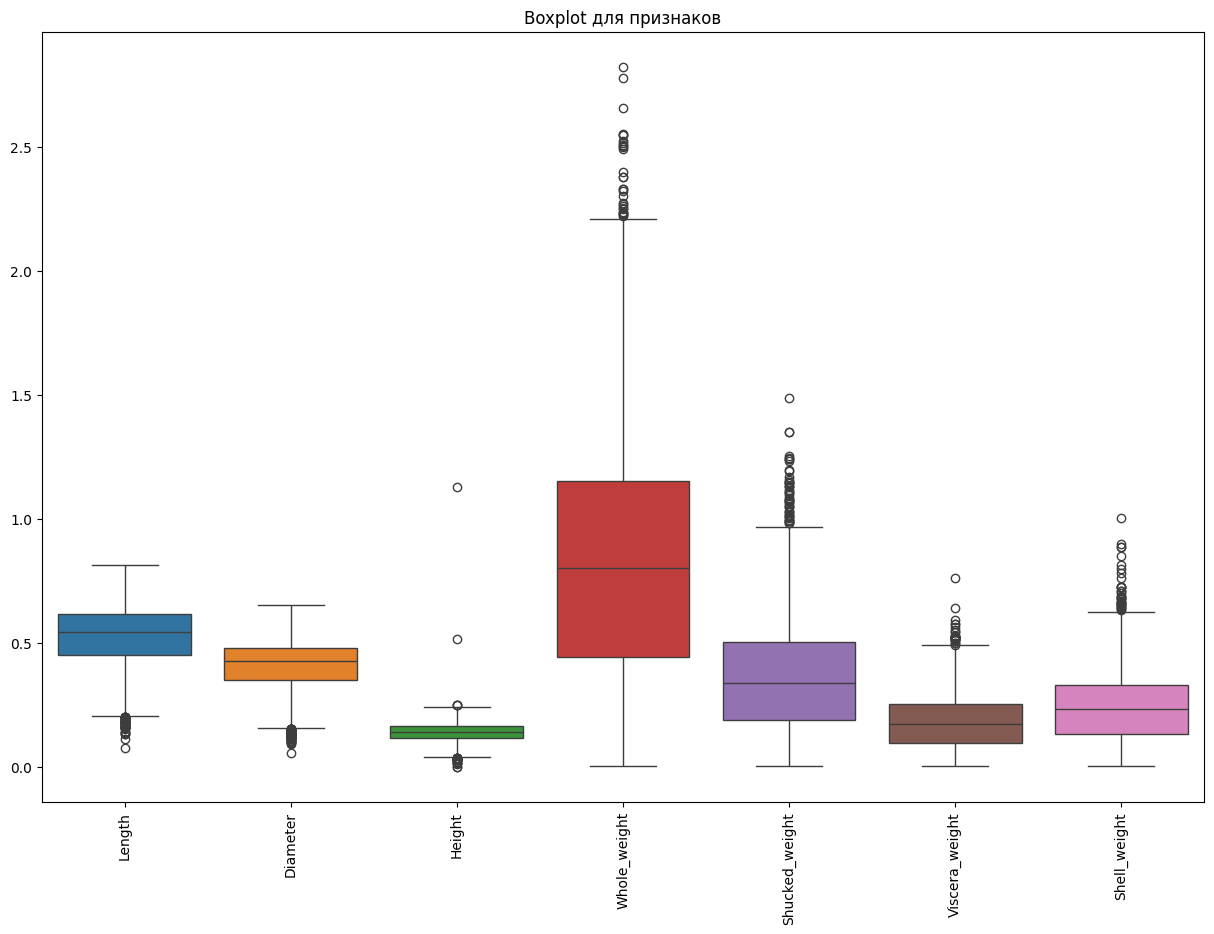

In [4]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Построение boxplot для каждого столбца в X
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()


In [5]:
!pip install pandas
import pandas as pd
data = pd.concat([X, y], axis=1)
data = data.drop_duplicates()

# Разделение обратно на X и y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.shape, y.shape

((4177, 8), (4177,))

In [6]:
!pip install scipy
!pip install numpy
from scipy.stats import shapiro
import numpy as np

numeric_columns = X.select_dtypes(include=[np.number]).columns
columns_to_test = [col for col in numeric_columns]

normality_results = {col: shapiro(X[col]) for col in columns_to_test}

for col, result in normality_results.items():
    print(f"{col}: W={result.statistic}, p-value={result.pvalue}")

Length: W=0.9696483612060547, p-value=7.371342185893487e-29
Diameter: W=0.9704715013504028, p-value=1.6389890123503843e-28
Height: W=0.8896296620368958, p-value=0.0
Whole_weight: W=0.972284734249115, p-value=1.0138014338196745e-27
Shucked_weight: W=0.9620664715766907, p-value=9.36098990030857e-32
Viscera_weight: W=0.9681379199028015, p-value=1.774917175594725e-29
Shell_weight: W=0.9704264402389526, p-value=1.568114549655691e-28


In [8]:
X_numeric = X.drop(columns=['Sex'])

# Вычисление Q1 и Q3
Q1 = X_numeric.quantile(0.25)
Q3 = X_numeric.quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов для каждой фичи
outliers = ((X_numeric < (Q1 - 1.5 * IQR)) | (X_numeric > (Q3 + 1.5 * IQR)))

# Подсчет количества выбросов для каждой фичи
outliers_count = outliers.sum()

# Получение индексов строк с выбросами (для всех фичей)
outlier_indices = outliers.any(axis=1).index[outliers.any(axis=1)]

# Вывод результатов
print(f"Индексы строк с выбросами: {outlier_indices.tolist()}")
print(f"Количество выбросов в каждой фиче: \n{outliers_count}")

Индексы строк с выбросами: [43, 44, 81, 129, 148, 149, 157, 163, 164, 165, 166, 167, 168, 170, 236, 237, 238, 239, 277, 305, 306, 321, 334, 358, 465, 520, 523, 525, 526, 611, 694, 696, 718, 719, 720, 891, 892, 898, 1048, 1051, 1052, 1053, 1054, 1055, 1056, 1174, 1193, 1197, 1199, 1202, 1204, 1206, 1207, 1209, 1210, 1257, 1417, 1418, 1422, 1426, 1427, 1428, 1429, 1527, 1528, 1749, 1750, 1754, 1756, 1757, 1759, 1761, 1762, 1763, 1821, 1823, 1824, 1982, 1985, 1986, 1987, 1988, 2051, 2090, 2108, 2114, 2115, 2157, 2161, 2169, 2171, 2172, 2179, 2208, 2265, 2274, 2334, 2343, 2368, 2371, 2380, 2381, 2458, 2544, 2545, 2623, 2624, 2625, 2675, 2709, 2710, 2711, 2712, 2810, 2811, 2862, 2863, 2970, 2972, 3007, 3008, 3082, 3141, 3143, 3148, 3149, 3151, 3188, 3190, 3318, 3380, 3427, 3472, 3473, 3521, 3599, 3600, 3628, 3713, 3715, 3716, 3800, 3837, 3899, 3902, 3928, 3961, 3962, 3993, 3994, 3996, 4145, 4148]
Количество выбросов в каждой фиче: 
Length            49
Diameter          59
Height           

In [9]:
X_no_outliers = X_numeric.drop(index=outlier_indices)
statistics_before = X_numeric.describe()
statistics_after = X_no_outliers.describe()
print("\nСтатистики до удаления выбросов:\n", statistics_before)
print("\nСтатистики после удаления выбросов:\n", statistics_after)


Статистики до удаления выбросов:
             Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight  
count     4177.000000   4177.000000  
mean         0.180594      0.238831  
std          0.109614      0.139203  
min          0.000500      0.001500  
25%          0.093500      0.130000  
50%          0.171000      0.23400

In [10]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [28]:
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [11]:
data = pd.concat([X, y], axis=1)

# Вычисление Q1 и Q3 для колонок Whole_weight и Shell_weight
Q1 = data[['Whole_weight', 'Shell_weight']].quantile(0.25)
Q3 = data[['Whole_weight', 'Shell_weight']].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов для колонок Whole_weight и Shell_weight
outliers = (data[['Whole_weight', 'Shell_weight']] < (Q1 - 1.5 * IQR)) | (data[['Whole_weight', 'Shell_weight']] > (Q3 + 1.5 * IQR))

# Индексы строк с выбросами
outlier_indices = outliers.any(axis=1)

# Создание X_no_outliers и y_no_outliers
X_no_outliers = data[~outlier_indices].drop(columns=['Rings'])
y_no_outliers = data[~outlier_indices]['Rings']
y_no_outliers.value_counts()

Rings
9     687
10    631
8     568
11    479
7     391
6     259
12    255
13    200
14    121
5     115
15    102
16     61
4      57
17     53
18     39
19     32
20     24
3      15
21     13
23      8
22      6
1       1
26      1
29      1
2       1
25      1
27      1
24      1
Name: count, dtype: int64

In [33]:
print(y.nunique())
print(y_no_outliers.nunique())

28
28


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: >

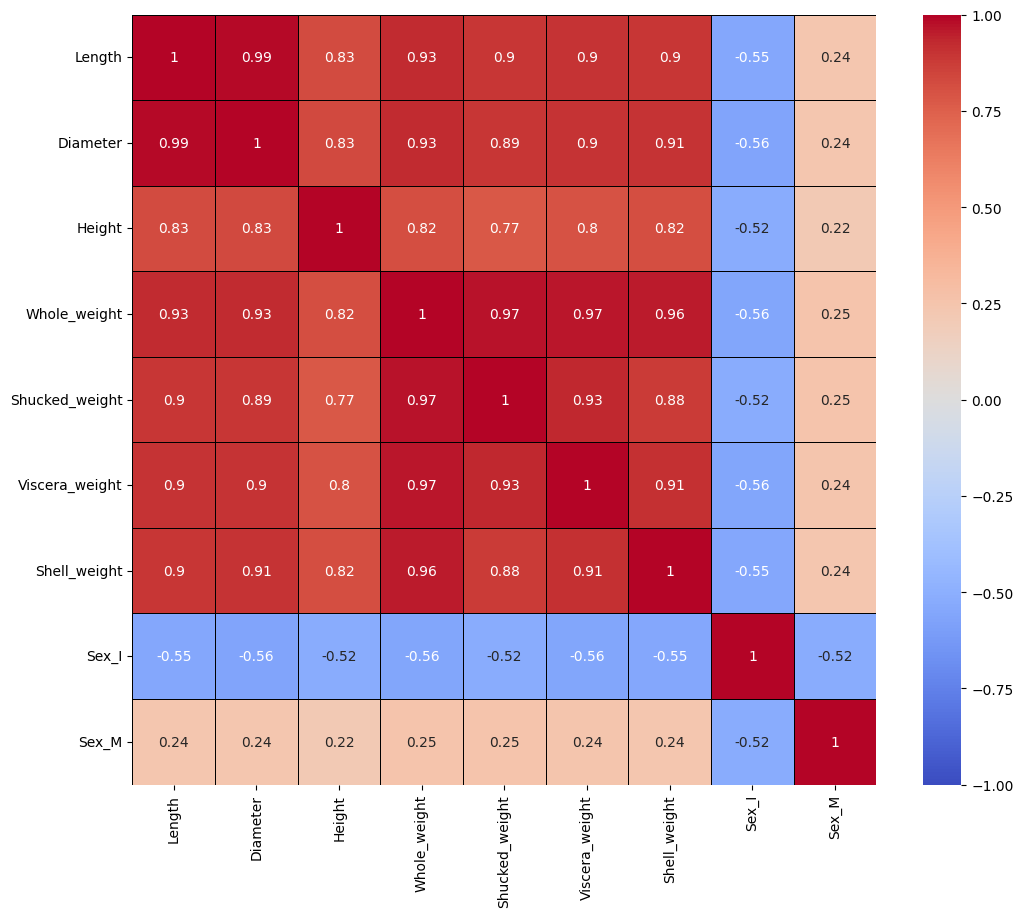

In [12]:
from sklearn.preprocessing import OneHotEncoder
# Отделение числовых данных и категориальных данных
X_numeric = X.drop(columns=['Sex'])
X_categorical = X[['Sex']]

# Кодирование категориальной переменной
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' чтобы избежать коллинеарности
X_encoded = encoder.fit_transform(X_categorical)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Sex']))

# Объединение закодированных данных с числовыми данными
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)

# Вычисление корреляционной матрицы
correlation_matrix = X_final.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

In [35]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


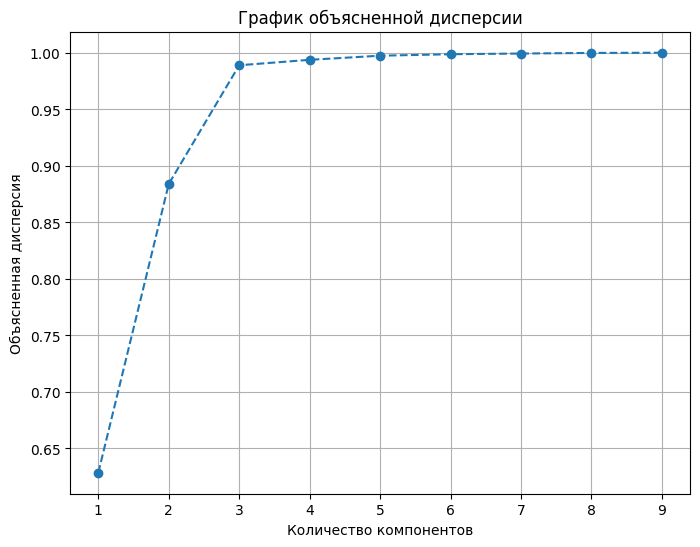

Количество компонентов, объясняющих 95% дисперсии: 3


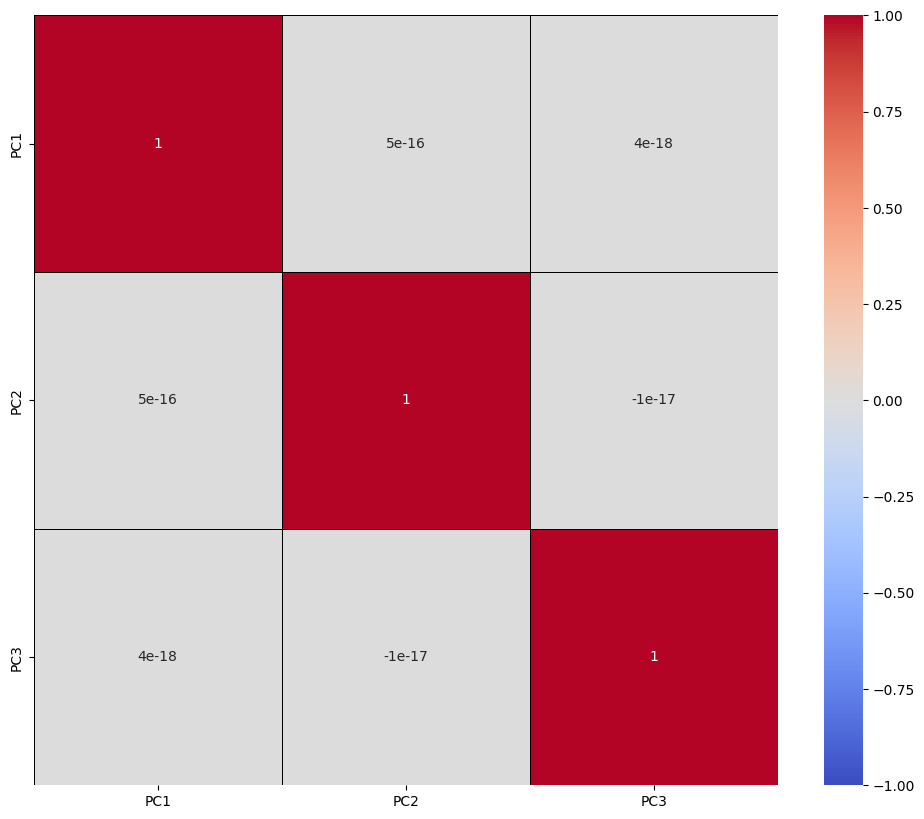

In [13]:

from sklearn.decomposition import PCA


# Применение PCA
pca = PCA()
pca.fit(X_final)

# Суммарная объясненная дисперсия
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Визуализация объясненной дисперсии
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Количество компонентов')
plt.ylabel('Объясненная дисперсия')
plt.title('График объясненной дисперсии')
plt.grid()
plt.show()

# Определение количества компонентов, объясняющих 95% дисперсии
n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f'Количество компонентов, объясняющих 95% дисперсии: {n_components_95}')

# Применение PCA с найденным количеством компонент
pca_optimal = PCA(n_components=n_components_95)
principal_components_optimal = pca_optimal.fit_transform(X_final)

# Создание нового DataFrame с главными компонентами
principal_df_optimal = pd.DataFrame(data=principal_components_optimal, columns=[f'PC{i+1}' for i in range(n_components_95)])

# Вычисление корреляционной матрицы для новых данных
correlation_matrix_pca_optimal = principal_df_optimal.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_pca_optimal, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.show()


In [46]:
X_no_outliers.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [14]:
encoder = OneHotEncoder(sparse=False, drop='first')
X_numeric_no_outliers = X_no_outliers.drop(columns=['Sex'])
X_categorical_no_outliers = X_no_outliers[['Sex']]
X_encoded_no_outliers = encoder.fit_transform(X_categorical_no_outliers)
X_encoded_df_no_outliers = pd.DataFrame(X_encoded_no_outliers, columns=encoder.get_feature_names_out(['Sex']))
X_numeric_no_outliers.reset_index(drop=True, inplace=True)
X_encoded_df_no_outliers.reset_index(drop=True, inplace=True)
# Объединение закодированных данных с числовыми данными

X_final_no_outliers = pd.concat([X_numeric_no_outliers, X_encoded_df_no_outliers], axis=1)
X_final_no_outliers.isnull().sum()




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Sex_I             0
Sex_M             0
dtype: int64

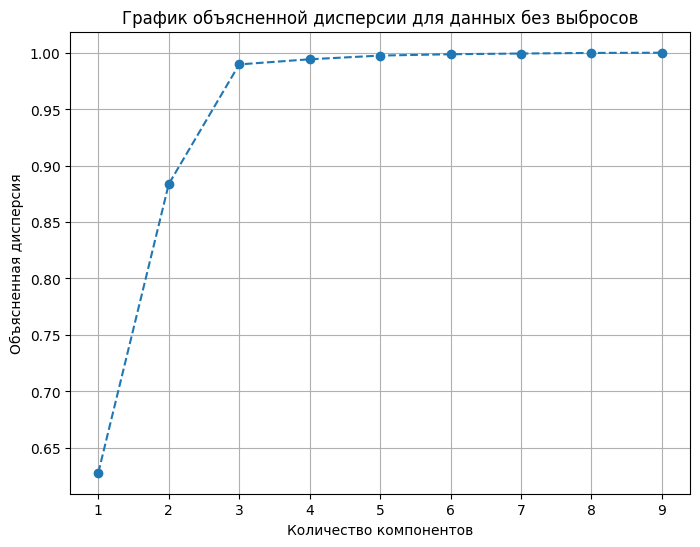

Количество компонентов, объясняющих 95% дисперсии для данных без выбросов: 3


In [15]:
# Применение PCA
pca_no_outliers = PCA()
pca_no_outliers.fit(X_final_no_outliers)

# Суммарная объясненная дисперсия
explained_variance_ratio_no_outliers = np.cumsum(pca_no_outliers.explained_variance_ratio_)

# Визуализация объясненной дисперсии
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_no_outliers) + 1), explained_variance_ratio_no_outliers, marker='o', linestyle='--')
plt.xlabel('Количество компонентов')
plt.ylabel('Объясненная дисперсия')
plt.title('График объясненной дисперсии для данных без выбросов')
plt.grid()
plt.show()

# Определение количества компонентов, объясняющих 95% дисперсии
n_components_95_no_outliers = np.argmax(explained_variance_ratio_no_outliers >= 0.95) + 1
print(f'Количество компонентов, объясняющих 95% дисперсии для данных без выбросов: {n_components_95_no_outliers}')

# Применение PCA с найденным количеством компонент
pca_optimal_no_outliers = PCA(n_components=n_components_95_no_outliers)
principal_components_optimal_no_outliers = pca_optimal_no_outliers.fit_transform(X_final_no_outliers)

# Создание нового DataFrame с главными компонентами
principal_df_optimal_no_outliers = pd.DataFrame(data=principal_components_optimal_no_outliers, columns=[f'PC{i+1}' for i in range(n_components_95_no_outliers)])

In [16]:
from sklearn.model_selection import train_test_split

# Предполагаем, что у вас уже есть principal_df_optimal и y

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(principal_df_optimal_no_outliers, y_no_outliers, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Проверка размеров выборок
print("Размер тренировочной выборки:", X_train.shape)
print("Размер валидационной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер тренировочной выборки: (2473, 3)
Размер валидационной выборки: (825, 3)
Размер тестовой выборки: (825, 3)


In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestCentroid
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, r2_score

# Определим скейлеры и гиперпараметры для каждой модели
scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    Normalizer(),
    PowerTransformer()
]

param_grid_knn_regressor = {
    'scaler': scalers,
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

param_grid_random_forest = {
    'scaler': scalers,
    'forest__n_estimators': [100, 200],
    'forest__max_depth': [None, 10, 20]
}

param_grid_gradient_boosting = {
    'scaler': scalers,
    'gboost__n_estimators': [100, 200],
    'gboost__learning_rate': [0.01, 0.1, 0.2],
    'gboost__max_depth': [3, 5, 7]
}

param_grid_linear_regression = {
    'scaler': scalers,
}

param_grid_svr = {
    'scaler': scalers,
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

# Функция для выполнения GridSearchCV
def grid_search_cv(pipeline, param_grid, X_train, y_train, X_val, y_val, model_type='regressor'):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    if model_type == 'classifier':
        score = classification_report(y_val, best_model.predict(X_val))
    elif model_type == 'regressor':
        score = r2_score(y_val, best_model.predict(X_val))

    return best_model, best_params, score

# Создание пайплайнов
pipeline_knn_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipeline_random_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestRegressor())
])

pipeline_gradient_boosting = Pipeline([
    ('scaler', StandardScaler()),
    ('gboost', GradientBoostingRegressor())
])

pipeline_linear_regression = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Применение GridSearchCV для каждой модели
best_models = {}

best_models['knn_regressor'], best_params_knn_regressor, score_knn_regressor = grid_search_cv(
    pipeline_knn_regressor, param_grid_knn_regressor, X_train, y_train, X_val, y_val
)

best_models['random_forest'], best_params_random_forest, score_random_forest = grid_search_cv(
    pipeline_random_forest, param_grid_random_forest, X_train, y_train, X_val, y_val
)

best_models['gradient_boosting'], best_params_gradient_boosting, score_gradient_boosting = grid_search_cv(
    pipeline_gradient_boosting, param_grid_gradient_boosting, X_train, y_train, X_val, y_val
)

best_models['linear_regression'], best_params_linear_regression, score_linear_regression = grid_search_cv(
    pipeline_linear_regression, param_grid_linear_regression, X_train, y_train, X_val, y_val
)

best_models['svr'], best_params_svr, score_svr = grid_search_cv(
    pipeline_svr, param_grid_svr, X_train, y_train, X_val, y_val
)

# Вывод результатов
print("Лучшие модели и параметры:")
print("KNN Regressor:", best_params_knn_regressor, "\nScore:", score_knn_regressor)
print("Random Forest Regressor:", best_params_random_forest, "\nScore:", score_random_forest)
print("Gradient Boosting Regressor:", best_params_gradient_boosting, "\nScore:", score_gradient_boosting)
print("Linear Regression:", best_params_linear_regression, "\nScore:", score_linear_regression)
print("SVR:", best_params_svr, "\nScore:", score_svr)


Лучшие модели и параметры:
KNN Regressor: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance', 'scaler': PowerTransformer()} 
Score: 0.3149029524307855
Random Forest Regressor: {'forest__max_depth': 10, 'forest__n_estimators': 200, 'scaler': Normalizer()} 
Score: 0.33861435141484064
Gradient Boosting Regressor: {'gboost__learning_rate': 0.01, 'gboost__max_depth': 3, 'gboost__n_estimators': 200, 'scaler': StandardScaler()} 
Score: 0.30327766344190576
Linear Regression: {'scaler': RobustScaler()} 
Score: 0.2703460025180221
SVR: {'scaler': RobustScaler(), 'svr__C': 10, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf'} 
Score: 0.28308244737771626


In [18]:
# Оценка лучших моделей на тестовой выборке
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    return score

# Создание моделей с лучшими параметрами
best_knn_regressor = Pipeline([
    ('scaler', PowerTransformer()),
    ('knn', KNeighborsRegressor(n_neighbors=9, weights='distance', metric='euclidean'))
])

best_random_forest = Pipeline([
    ('scaler', Normalizer()),
    ('forest', RandomForestRegressor(n_estimators=200, max_depth=10))
])

best_gradient_boosting = Pipeline([
    ('scaler', StandardScaler()),
    ('gboost', GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=3))
])

best_linear_regression = Pipeline([
    ('scaler', RobustScaler()),
    ('linear', LinearRegression())
])

best_svr = Pipeline([
    ('scaler', RobustScaler()),
    ('svr', SVR(C=10, epsilon=0.5, kernel='rbf'))
])

# Обучение моделей на полной обучающей выборке
best_knn_regressor.fit(X_train, y_train)
best_random_forest.fit(X_train, y_train)
best_gradient_boosting.fit(X_train, y_train)
best_linear_regression.fit(X_train, y_train)
best_svr.fit(X_train, y_train)

# Оценка моделей на тестовой выборке
knn_score = evaluate_model(best_knn_regressor, X_test, y_test)
random_forest_score = evaluate_model(best_random_forest, X_test, y_test)
gradient_boosting_score = evaluate_model(best_gradient_boosting, X_test, y_test)
linear_regression_score = evaluate_model(best_linear_regression, X_test, y_test)
svr_score = evaluate_model(best_svr, X_test, y_test)

# Вывод результатов
print("Оценка моделей на тестовой выборке:")
print("KNN Regressor:", knn_score)
print("Random Forest Regressor:", random_forest_score)
print("Gradient Boosting Regressor:", gradient_boosting_score)
print("Linear Regression:", linear_regression_score)
print("SVR:", svr_score)


Оценка моделей на тестовой выборке:
KNN Regressor: 0.3867007743922234
Random Forest Regressor: 0.4253447868378606
Gradient Boosting Regressor: 0.4149038998048866
Linear Regression: 0.37418359260952905
SVR: 0.4036108581897585
